In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

ĐỌC DỮ LIỆU TỪ FILE CSV

In [15]:
Data_inland = pd.read_csv('Datasets/housing_inland.csv')
Data_near_ocean = pd.read_csv('Datasets/housing_near_ocean.csv')

VẤN ĐỀ 02: 

- Xây dựng khoảng tin cậy cho $\mu$ 

- Kiểm dịnh giá thuyết:

    + Với giá nhà: kiểm định rằng " $\mu$ > 31000$ hay không"
    + Với thu nhập: kiểm định rằng " $\mu$ > 3100$  hay không"

Ở đây, tôi sẽ xây dựng khoảng tin cậy 95%

-> $\alpha$ = 0.05 -> $Z_{\alpha/2}$ $\approx$ $1.95996$

In [16]:
CI_level = 0.95 
alpha = 1 - CI_level
Z_alpha2 = norm.ppf(0.975,0,1) #(giá trị muốn tính, mean, std)

Tiếp theo ta sẽ tính $\bar{x}$ của Median Housing Value và Median Income của những căn nhà trong đất liền

In [39]:
mean_inland_income = Data_inland.describe()['median_income'].loc['mean']
std_inland_income = Data_inland.describe()['median_income'].loc['std']

mean_inland_house_value = Data_inland.describe()['median_house_value'].loc['mean']
std_inland_house_value = Data_inland.describe()['median_house_value'].loc['std']

Khoảng tin cậy của giá trị trung bình cho thu nhập trung bình

In [42]:
lower_inland_income_CI = mean_inland_income - Z_alpha2*(std_inland_income/math.sqrt(Data_inland.shape[0]))
upper_inland_income_CI = mean_inland_income + Z_alpha2*(std_inland_income/math.sqrt(Data_inland.shape[0]))

In [43]:
print(f'Khoảng tin cậy 95% của thu nhập trung bình là ({lower_inland_income_CI:.2f},{upper_inland_income_CI:.2f})')

Khoảng tin cậy 95% của thu nhập trung bình là (3.17,3.24)


Khoảng tin cậy của giá trị trung bình cho giá nhà

In [ ]:
lower_inland_house_value_CI = mean_inland_house_value - Z_alpha2*(std_inland_house_value/math.sqrt(Data_inland.shape[0]))
upper_inland_house_value_CI = mean_inland_house_value + Z_alpha2*(std_inland_house_value/math.sqrt(Data_inland.shape[0]))

In [45]:
print(f'Khoảng tin cậy 95% của giá nhà trung bình là ({lower_inland_house_value_CI:.2f},{upper_inland_house_value_CI:.2f})')

Khoảng tin cậy 95% của giá nhà trung bình là (123110.11,126500.67)


Trực quan hóa khoảng tin cậy

Text(0.5, 1.0, 'Khoảng tin cậy 95% của trung bình thu nhập')

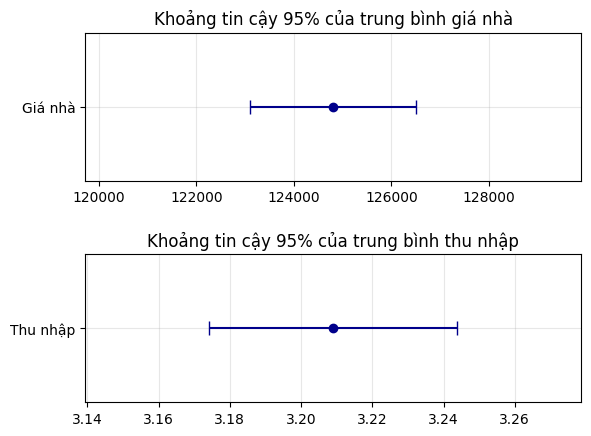

In [69]:
fig,ax = plt.subplots(2,1)

ax[0].errorbar(y=['Giá nhà'],
             x=[mean_inland_house_value],
             xerr=[Z_alpha2*(std_inland_house_value/math.sqrt(Data_inland.shape[0]))],
             fmt='o',capsize=5,color='darkblue')
ax[0].margins(1)
ax[0].grid(alpha=0.3)
ax[0].set_title(f'Khoảng tin cậy 95% của trung bình giá nhà')

plt.subplots_adjust(hspace=0.5)
ax[1].errorbar(y=['Thu nhập'],
             x=[mean_inland_income],
             xerr=[Z_alpha2*(std_inland_income/math.sqrt(Data_inland.shape[0]))],
             fmt='o',capsize=5,color='darkblue')
ax[1].margins(0.5)
ax[1].grid(alpha=0.3)
ax[1].set_title(f'Khoảng tin cậy 95% của trung bình thu nhập')